In [ ]:
import os

# Install es_MX
!/usr/share/locales/install-language-pack pt_BR.UTF-8
!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
os.kill(os.getpid(), 9)


Generating locales (this might take a while)...
  pt_BR.UTF-8... done
Generation complete.
dpkg-trigger: error: must be called from a maintainer script (or with a --by-package option)

Type dpkg-trigger --help for help about this utility.
Generating locales (this might take a while)...
  en_US.UTF-8... done
  pt_BR.UTF-8... done
Generation complete.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from locale import atof, setlocale, LC_NUMERIC, LC_MONETARY
setlocale(LC_MONETARY, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [33]:
df = pd.read_csv('/content/drive/MyDrive/ufpe/Eletivas/if697 ds/serie_historica_precos_combustiveis-2021-02.csv', encoding = 'ISO-8859-1', sep=';')

In [4]:
print(df.columns)
print(df.dtypes)

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')
Regiao - Sigla        object
Estado - Sigla        object
Municipio             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Numero Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object


In [34]:
### Renaming collumns name for clarity
df.set_axis(['regiao', 'estado', 'municipio', 'revenda', 'cnpj', 'rua', 'numero', 'complemento', 'bairro', 'cep', 'produto', 'dtcoleta', 'vlvenda', 'vlcompra', 'medida', 'bandeira'], axis=1, inplace=True)

In [35]:
### FILTERING ONLY ETANOL AND GAS
products = ['GASOLINA', 'ETANOL']
df=df[df.produto.isin(products)]

In [10]:
### No one informs the price of purchase
print(f"total rows {df.shape[0]} total of null in buy value: {df.vlcompra.isnull().sum()}")
### Check if some of the needed values are missing
print(f"total rows {df.shape[0]} total of null in região value: {df.regiao.isnull().sum()}")
print(f"total rows {df.shape[0]} total of null in estado value: {df.estado.isnull().sum()}")
print(f"total rows {df.shape[0]} total of null in produto value: {df.produto.isnull().sum()}")
print(f"total rows {df.shape[0]} total of null in dtcoleta value: {df.dtcoleta.isnull().sum()}")
print(f"total rows {df.shape[0]} total of null in vlvenda value: {df.vlvenda.isnull().sum()}")
### No need for removing rows

total rows 225195 total of null in buy value: 225195
total rows 225195 total of null in região value: 0
total rows 225195 total of null in estado value: 0
total rows 225195 total of null in produto value: 0
total rows 225195 total of null in dtcoleta value: 0
total rows 225195 total of null in vlvenda value: 0


In [36]:
### Casting data to date to help on aggregation and vlvenda to float to help on numerical operations
df.dtcoleta = pd.to_datetime(df.dtcoleta)
df['ano'] = df.dtcoleta.dt.year
df['mes'] = df.dtcoleta.dt.month
df.vlvenda = df.vlvenda.str.replace(',', '.').astype(float)

In [63]:
### Most common value
# mode = df.groupby('produto')['vlvenda'].mode()
mode = df.groupby('produto').mean()['vlvenda']
print(mode)
### Number of occurrencies
# print(df.vlvenda.value_counts())
df.groupby('produto').vlvenda.value_counts()
# df.vlvenda.value_counts().iloc[0] 

produto
ETANOL      5.055695
GASOLINA    6.273807
Name: vlvenda, dtype: float64


produto   vlvenda
ETANOL    4.999      4652
          5.199      3144
          5.299      2888
          4.899      2649
          5.399      2635
                     ... 
GASOLINA  7.714         1
          7.829         1
          7.889         1
          7.898         1
          7.960         1
Name: vlvenda, Length: 3263, dtype: int64

In [62]:
df_sentido = df.groupby(['regiao', 'ano', 'mes', 'produto'], as_index=False)['vlvenda'].mean()
# df_sentido.set_axis(['regiao', 'ano', 'mes', 'produto', 'vlvenda'], axis=1, inplace=True)
df_sentido['+/-'] = np.where(df_sentido.vlvenda.diff() > 0, '+', np.where(df_sentido.vlvenda.diff() < 0, '-', np.where(df_sentido.vlvenda.diff() == 0, '0', '')))
df_sentido['difference'] = df_sentido.vlvenda.diff()
print(df_sentido)

    regiao   ano   produto   vlvenda +/-  difference
0       CO  2021    ETANOL  5.059788             NaN
1       CO  2021  GASOLINA  6.586239   +    1.526452
2       CO  2021    ETANOL  5.036514   -   -1.549726
3       CO  2021  GASOLINA  6.606044   +    1.569530
4       CO  2021    ETANOL  5.018299   -   -1.587745
..     ...   ...       ...       ...  ..         ...
115     SE  2021  GASOLINA  6.334495   +    1.356743
116     SE  2021    ETANOL  5.303951   -   -1.030544
117     SE  2021  GASOLINA  6.541666   +    1.237715
118     SE  2021    ETANOL  5.077093   -   -1.464573
119     SE  2021  GASOLINA  6.483570   +    1.406477

[120 rows x 6 columns]


regiao  ano   produto 
CO      2021  ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
N       2021  ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
NE      2021  ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
S       2021  ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
SE      2021  ETANOL      AxesSubplot(0.125,0.125;0.775x0.755)
              GASOLINA    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

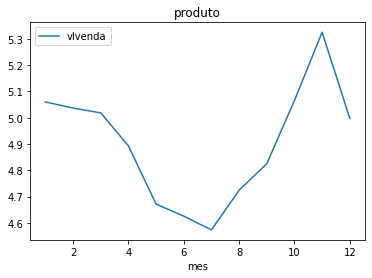

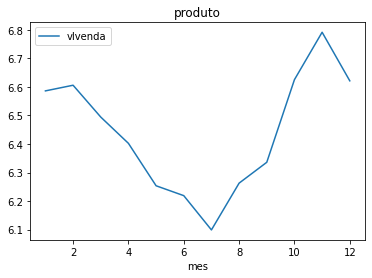

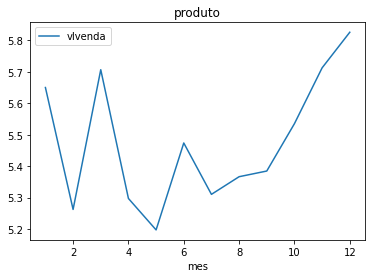

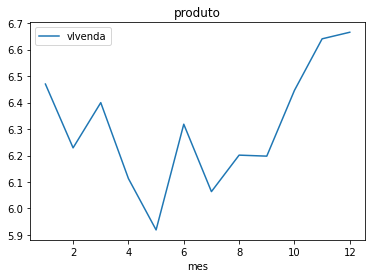

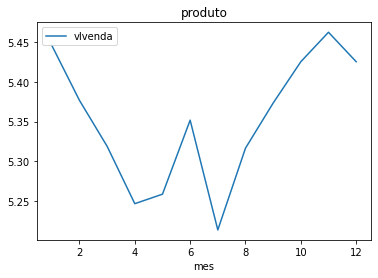

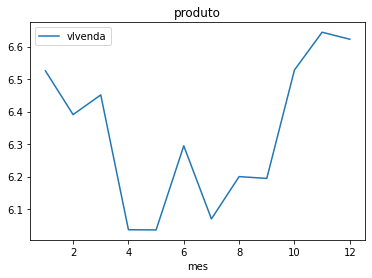

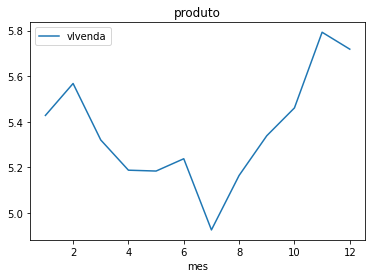

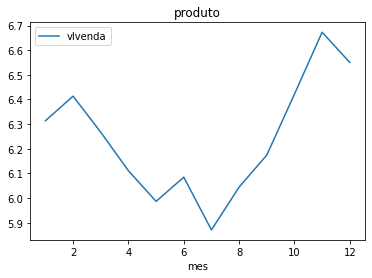

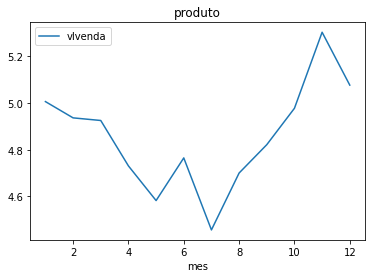

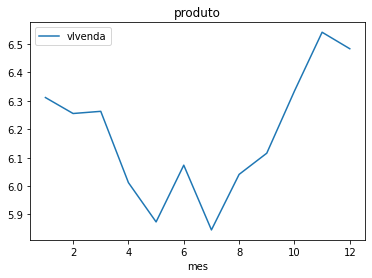

In [59]:
# df_sentido.groupby(['regiao', 'ano', 'produto']).plot(x='mes', y='vlvenda' ,legend=True, title='produto')

df_sentido.groupby(['regiao', 'ano', 'produto']).plot(x='mes', y='vlvenda' ,legend=True, title='produto')